This code sets up and prepares the *CIFAKE* dataset for training and testing a machine learning model. The user first uploads their own Kaggle API key (kaggle.json), installs the Kaggle Python package, and configures authentication settings to access Kaggle datasets. Using the authenticated API, it downloads and unzips the "CIFAKE: Real and AI-Generated Synthetic Images" dataset into the environment. After ensuring the correct dataset directory is set, the code uses TensorFlow’s *image_dataset_from_directory* function to load the training and testing images into TensorFlow datasets, automatically resizing all images to 128×128 pixels and organizing them into batches of 500. Finally, it prints the available class labels for the user to verify that the datasets have been loaded correctly and are ready to be used for model training and evaluation.

In [20]:
# Install this first
!pip install lpips


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [2]:
# THIS IS IMPORTANT IN ORDER TO RUN SOME OF THE CODE CELLS BELOW
# 1. Access this link: https://drive.google.com/drive/folders/1Glkvd8CqQwPk38LJiVh6cUG4-8RrL-h2?usp=sharing. This is the link for our shared Google Drive
# 2. Click on the title of the drive: Intro ML Final Project -> Organize -> Add Shortcut -> My Drive (this is really important)
# 3. Once the shortcut is added to "My Drive", refresh the notebook and run this cell again. You should be able to see the folder contents.

from google.colab import drive
import os

drive.mount('/content/drive')

FOLDER = '/content/drive/My Drive/Intro ML Final Project'

os.chdir(FOLDER)

print("Working directory:", os.getcwd())
print("Folder contents:", os.listdir('.'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Working directory: /content/drive/My Drive/Intro ML Final Project
Folder contents: ['cifake-real-and-ai-generated-synthetic-images.zip', 'Intro ML Project Proposal: Tim, Austin, Mikail, David.gdoc', 'final_project_spring_2025.pdf', '__pycache__', 'eval_output', 'GENERAL PLAN.gdoc', 'Copy of AI_Image_Detection_CNN.ipynb', 'cnn_1', 'skip_vae_stage1.pth', 'skip_vae_two_stage.pth', 'skip_vae_two_stage_final.pth', 'Write-up Final.gdoc', 'AI_Image_Detection_CNN.ipynb']


In [3]:
# NOTE: YOU MUST DO THIS ON GOOGLE COLAB IN ORDER TO ACCESS OUR DATASET
# 1. Create an account on kaggle.com
# 2. Go to settings -> API -> Create new token -> Download token
# 3. You should've downloaded a file called kaggle.json which this cell will then add you to upload

from google.colab import files
files.upload()  # HERE we want to select kaggle.json

!pip install --quiet kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

from kaggle.api.kaggle_api_extended import KaggleApi
import os

api = KaggleApi()
api.authenticate()

slug = 'birdy654/cifake-real-and-ai-generated-synthetic-images'


api.dataset_download_files(slug, path='/content', unzip=True, quiet=False)

# The folder disappears after we unzip it sometimes so we check if the folder is still there or not
root = '/content'
contents = os.listdir(root)
if 'train' in contents and 'test' in contents:
    dataset_dir = root
else:
    folder = slug.split('/')[-1]
    dataset_dir = os.path.join(root, folder)

print('Using dataset directory:', dataset_dir)
print('Subfolders:', os.listdir(dataset_dir))

# We want to access our images as tensor flow datasets, if we try to access them one image at a time as a .png file, the dataset will be too big to use

import tensorflow as tf
img_height = 128
img_width  = 128
batch_size = 500


with tf.device('/CPU:0'):
    train_ds = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_dir, 'train'),
        seed=512,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )
    test_ds = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_dir, 'test'),
        seed=512,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

print('Training classes:', train_ds.class_names)
print('Testing  classes:', test_ds.class_names)


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images
Using dataset directory: /content
Subfolders: ['.config', 'drive', 'train', 'test', 'sample_data']
Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Training classes: ['FAKE', 'REAL']
Testing  classes: ['FAKE', 'REAL']


In [ ]:
# We want to confirm that we were able to download the images correctly.

import matplotlib.pyplot as plt
import numpy as np

# We want to show 9 images
num_images = 9

for images, labels in train_ds.take(1):
    batch_images = images.numpy().astype("uint8")
    batch_labels = labels.numpy()
    break

class_names = train_ds.class_names

# Plot the images
plt.figure(figsize=(6, 6))
for i in range(num_images):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(batch_images[i])
    plt.title(class_names[batch_labels[i]])
    plt.axis("off")

plt.show()


In [13]:
# This is our first CNN that we implemented. It is a classic CNN that uses the VGGNet-11 encoder and also incorporates a learning rate decay.
# This CNN takes an extremely long time to run especially when compared to the other ones.
#
# (For my group, DO NOT run this cell again as we don't want to waste time)

!python cnn_1/train_classification_cnn.py \
    --dataset custom \
    --data_dir /content/ \
    --n_batch 64 \
    --encoder_type 'vggnet11' \
    --n_epoch 20 \
    --learning_rate 0.1 \
    --learning_rate_decay 0.95 \
    --learning_rate_period 5 \
    --checkpoint_path /content/checkpoints \
    --device 'cuda'


2025-05-05 02:20:44.521703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746411644.542416   30569 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746411644.548664   30569 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Epoch=1/20  Loss: 0.694
Epoch=2/20  Loss: 0.694
Epoch=3/20  Loss: 0.680
Epoch=4/20  Loss: 0.611
Epoch=5/20  Loss: 0.447
Epoch=6/20  Loss: 0.363
Epoch=7/20  Loss: 0.317
Epoch=8/20  Loss: 0.280
Epoch=9/20  Loss: 0.236
Epoch=10/20  Loss: 0.211
Epoch=11/20  Loss: 0.191
Epoch=12/20  Loss: 0.186
Epoch=13/20  Loss: 0.170
Epoch=14/20  Loss: 0.160
Epoch=15/20  Loss: 0.153
Epoch=16/20  Loss: 0.148
Epoch=17/20  Loss: 0.141
Epoch=18/20  Loss: 0.

In [14]:
!python cnn_1/run_classification_cnn.py \
    --data_dir /content/ \
    --checkpoint /content/checkpoints/model-19.pth \
    --output /output/ \
    --encoder_type 'vggnet11' \
    --n_batch 64 \
    --device 'cuda'


2025-05-05 03:30:59.071432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746415859.094046   48182 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746415859.100337   48182 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Mean accuracy over 20000 images: 95.315%


In [16]:
# This is our second CNN that we implemented.

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(128, 128, 3)),
    tf.keras.layers.Rescaling(scale=1./255),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(),

    loss='binary_crossentropy',

    metrics=['accuracy', tf.keras.metrics.AUC(name='roc_auc'),
        tf.keras.metrics.AUC(name='pr_auc', curve='PR'),
        tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("--Train start--")

history_old = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=10,
  verbose=1
)
print("--Train end--")


--Train start--
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 141ms/step - accuracy: 0.6697 - loss: 1.5424 - pr_auc: 0.6630 - precision_5: 0.6648 - recall_5: 0.6866 - roc_auc: 0.7040 - val_accuracy: 0.8246 - val_loss: 0.3820 - val_pr_auc: 0.9057 - val_precision_5: 0.8225 - val_recall_5: 0.8278 - val_roc_auc: 0.9090
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 143ms/step - accuracy: 0.8357 - loss: 0.3658 - pr_auc: 0.9156 - precision_5: 0.8262 - recall_5: 0.8512 - roc_auc: 0.9176 - val_accuracy: 0.8480 - val_loss: 0.3465 - val_pr_auc: 0.9283 - val_precision_5: 0.8709 - val_recall_5: 0.8172 - val_roc_auc: 0.9296
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 143ms/step - accuracy: 0.8583 - loss: 0.3245 - pr_auc: 0.9343 - precision_5: 0.8488 - recall_5: 0.8722 - roc_auc: 0.9356 - val_accuracy: 0.8526 - val_loss: 0.3332 - val_pr_auc: 0.9302 - val_precision_5: 0.8379 - val_recall_5: 0.8742 - val_roc_auc: 0.9316
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.8670 - loss: 0.308

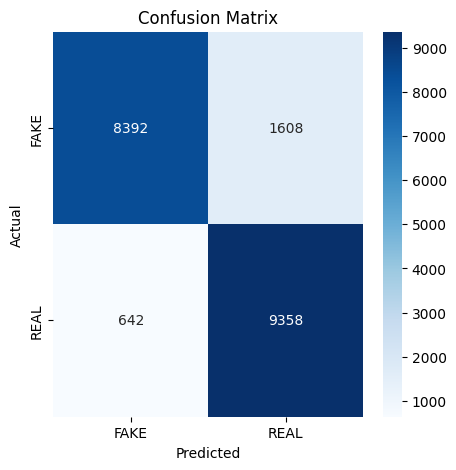

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = []
y_pred = []

for images, labels in test_ds:
    probs = model.predict(images, verbose=0)[:, 0]
    preds = (probs >= 0.5).astype(int)

    y_true.extend(labels.numpy().tolist())
    y_pred.extend(preds.tolist())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)
classes = train_ds.class_names

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:

# This is our third CNN that we implemented that takes advantage of a pretrained CNN on ImageNet which is a collection of common images

import tensorflow as tf

base = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)

base.trainable = False

inputs  = tf.keras.Input(shape=(128, 128, 3))
x = tf.keras.layers.Rescaling(1./255)(inputs)

x = base(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

history = model.fit(train_ds, validation_data=test_ds, epochs=5, verbose=1)

for layer in base.layers[int(len(base.layers) * 0.67):]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='roc_auc'),
    tf.keras.metrics.AUC(name='pr_auc', curve='PR'),
    tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

history_ft = model.fit(train_ds, validation_data=test_ds, initial_epoch=history.epoch[-1] + 1, epochs=15, verbose=1)




9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 54s 186ms/step - accuracy: 0.7644 - loss: 0.5008 - precision_2: 0.7625 - recall_2: 0.7700 - val_accuracy: 0.8674 - val_loss: 0.3169 - val_precision_2: 0.8716 - val_recall_2: 0.8617
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 0.8569 - loss: 0.3261 - precision_2: 0.8550 - recall_2: 0.8599 - val_accuracy: 0.8790 - val_loss: 0.2908 - val_precision_2: 0.8823 - val_recall_2: 0.8747
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - accuracy: 0.8633 - loss: 0.3158 - precision_2: 0.8621 - recall_2: 0.8655 - val_accuracy: 0.8815 - val_loss: 0.2840 - val_precision_2: 0.8755 - val_recall_2: 0.8895
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 152ms/step - accuracy: 0.8665 - loss: 0.3099 - precision_2: 0.8636 - recall_2: 0.8709 - val_accuracy: 0.8840 - val_loss: 0.2809 - val_precision_2: 0.8832 - val_recall_2: 0.8851
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 147ms/step - accuracy: 0.866

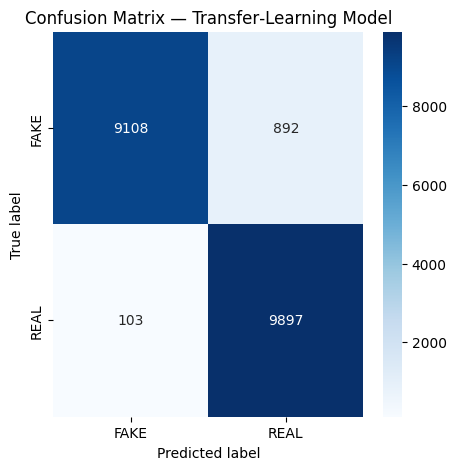

In [11]:
y_true, y_pred = [], []
for batch_imgs, batch_labels in test_ds:
    probs = model.predict(batch_imgs, verbose=0)[:, 0]
    preds = (probs >= 0.5).astype(int)
    y_true.extend(batch_labels.numpy())
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)
labels = train_ds.class_names

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix — Transfer‑Learning Model')
plt.show()

In [12]:
import tensorflow as tf
from tensorflow.keras import layers as L

weight_decay = 0.0001

inputs = L.Input(shape=(128, 128, 3))
x = L.Rescaling(1./255)(inputs)

for filters in [32, 64, 128]:
    x = L.Conv2D(filters, 3, padding='same',
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(x)
    x = L.BatchNormalization()(x)
    x = L.ReLU()(x)
    x = L.SpatialDropout2D(0.2)(x)
    x = L.MaxPooling2D()(x)

x = L.GlobalAveragePooling2D()(x)
x = L.Dropout(0.35)(x)
outputs = L.Dense(1, activation='sigmoid')(x)

model_reg = tf.keras.Model(inputs, outputs)

opt = tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=weight_decay)

model_reg.compile(
    optimizer=opt,
    loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05),
    metrics=['accuracy', tf.keras.metrics.AUC(name='roc_auc'),
        tf.keras.metrics.AUC(name='pr_auc', curve='PR'),
        tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

history_reg = model_reg.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    batch_size=32,
    callbacks=[early],
    verbose=1
)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 78s 266ms/step - accuracy: 0.6568 - loss: 0.6532 - pr_auc: 0.7119 - precision_4: 0.6526 - recall_4: 0.6721 - roc_auc: 0.7143 - val_accuracy: 0.5020 - val_loss: 0.7119 - val_pr_auc: 0.5505 - val_precision_4: 0.8000 - val_recall_4: 0.0052 - val_roc_auc: 0.5348
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 59s 258ms/step - accuracy: 0.7870 - loss: 0.5038 - pr_auc: 0.8684 - precision_4: 0.7780 - recall_4: 0.8052 - roc_auc: 0.8665 - val_accuracy: 0.4913 - val_loss: 0.7826 - val_pr_auc: 0.4853 - val_precision_4: 0.4527 - val_recall_4: 0.0838 - val_roc_auc: 0.4831
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 258ms/step - accuracy: 0.8224 - loss: 0.4560 - pr_auc: 0.9039 - precision_4: 0.8166 - recall_4: 0.8318 - roc_auc: 0.9007 - val_accuracy: 0.6431 - val_loss: 0.6541 - val_pr_auc: 0.7740 - val_precision_4: 0.5952 - val_recall_4: 0.8942 - val_roc_auc: 0.7652
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 254ms/step - accuracy: 0.8377 - loss: 0.4291 - pr_auc: 0.92

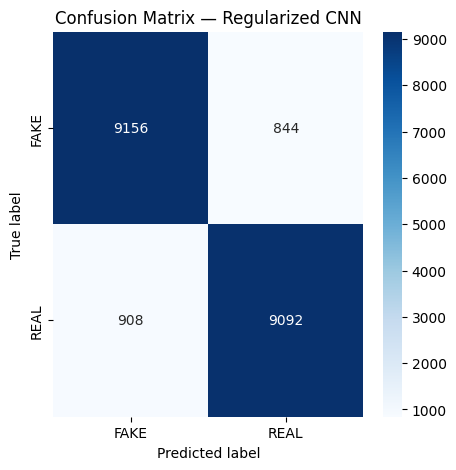

In [13]:
y_true, y_pred = [], []
for batch_imgs, batch_labels in test_ds:
    probs = model_reg.predict(batch_imgs, verbose=0)[:, 0]
    preds = (probs >= 0.5).astype(int)

    y_true.extend(batch_labels.numpy())
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)
labels = train_ds.class_names

plt.figure(figsize=(5,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=labels, yticklabels=labels
)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix — Regularized CNN')
plt.show()

In [14]:
# Plots statistics about the CNNs such as loss, accuracy, AUC, etc.

import matplotlib.pyplot as plt

def plot_training_history(history):
    hist = history.history
    epochs = range(1, len(hist['loss']) + 1)

    all_metrics = [
        ('loss', 'Loss'),
        ('accuracy', 'Accuracy'),
        ('roc_auc', 'ROC AUC'),
        ('pr_auc', 'PR AUC'),
        ('precision', 'Precision'),
        ('recall', 'Recall'),
    ]

    metrics = [(key, name) for key, name in all_metrics if key in hist]

    n = len(metrics)
    if n == 0:
        print("No plottable metrics found in history.")
        return


    fig, axes = plt.subplots(1, n, figsize=(4 * n, 3), squeeze=False)

    for i, (key, title) in enumerate(metrics):
        ax = axes[0, i]
        ax.plot(epochs, hist[key],    linestyle='-', label=f'Train {title}')
        val_key = f'val_{key}'
        if val_key in hist:
            ax.plot(epochs, hist[val_key], linestyle='--', label=f'Val {title}')
        ax.set_title(title)
        ax.set_xlabel('Epoch')
        ax.set_ylabel(title)
        ax.legend(loc='best', fontsize='small')

    fig.tight_layout()
    plt.show()


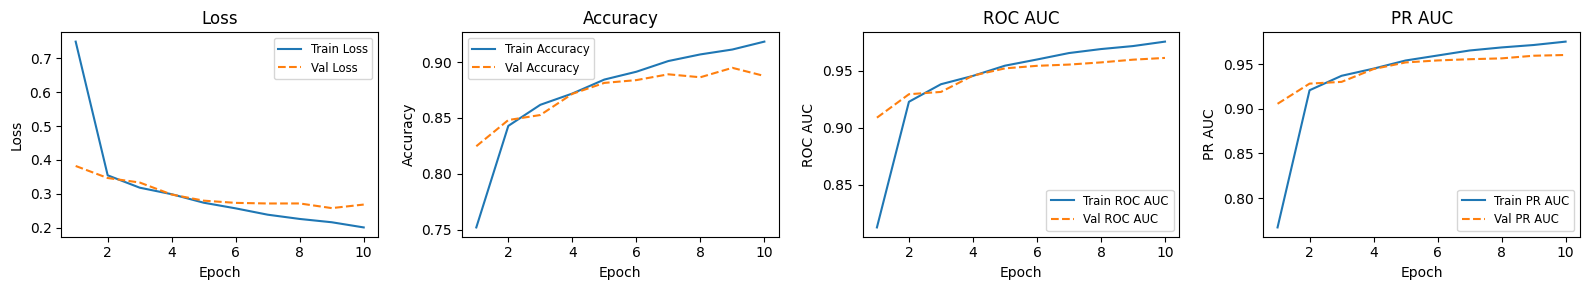

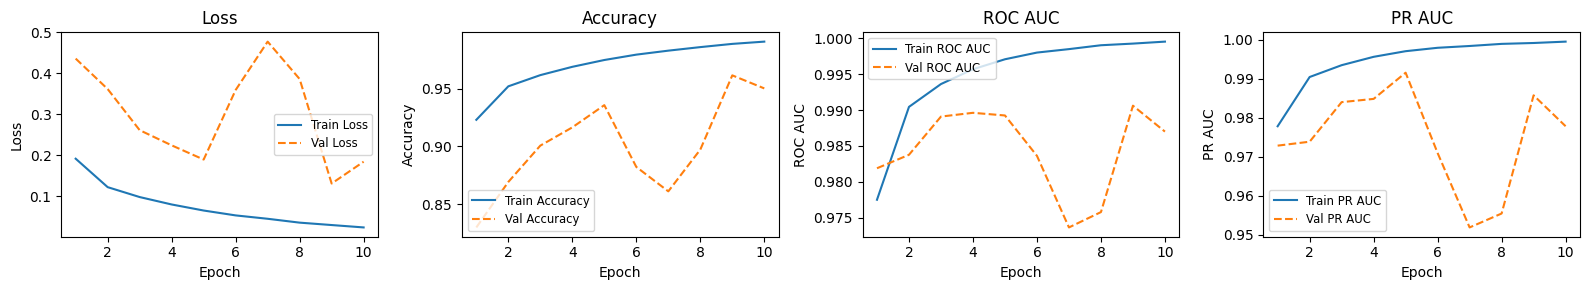

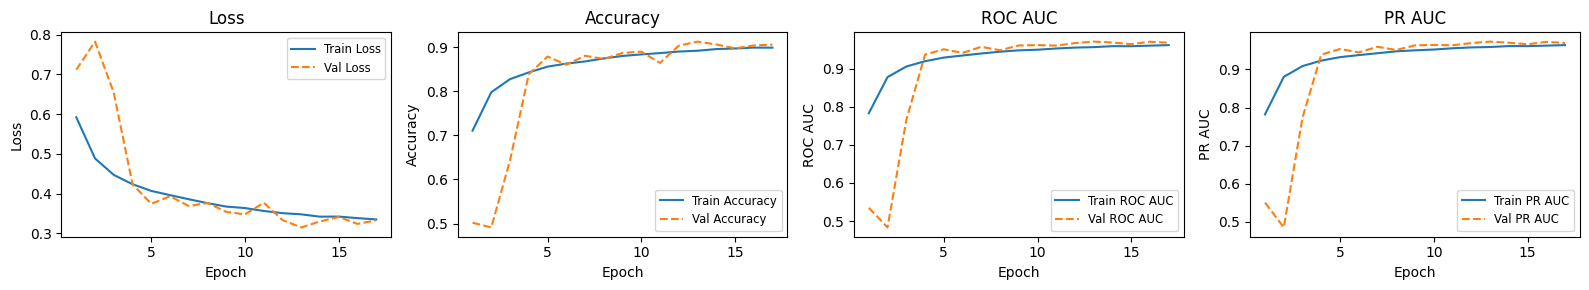

In [18]:
# Plotting some statistics

plot_training_history(history_old)
plot_training_history(history_ft)
plot_training_history(history_reg)

The code below is to implement our VAEs

In [5]:
# First we want to implement some architectural blocks

import torch
import torch.nn as nn
import torch.nn.functional as F
import lpips
import tensorflow as tf

class ConvBlock(nn.Module):
    def __init__(self, in_c: int, out_c: int, down: bool = True):
        super().__init__()
        stride = 2 if down else 1
        self.seq = nn.Sequential(
            nn.Conv2d(in_c, out_c, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_c),
            nn.ReLU(inplace=True),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq(x)

class UpBlock(nn.Module):
    def __init__(self, in_c: int, out_c: int):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
            nn.Conv2d(in_c, out_c, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_c),
            nn.ReLU(inplace=True),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq(x)

class SkipConvVAE(nn.Module):
    def __init__(self, img_size: int = 128, latent_dim: int = 256):
        super().__init__()
        self.img_size = img_size
        assert img_size % 16 == 0
        f = img_size // 16

        # encoder
        self.enc1 = ConvBlock(3,  32, down=True)
        self.enc2 = ConvBlock(32, 64, down=True)
        self.enc3 = ConvBlock(64,128, down=True)
        self.enc4 = ConvBlock(128,256, down=True)
        self.enc5 = ConvBlock(256,512, down=False)

        flat_dim = 512 * f * f
        self.fc_mu  = nn.Linear(flat_dim, latent_dim)
        self.fc_log = nn.Linear(flat_dim, latent_dim)
        self.fc_dec = nn.Linear(latent_dim, flat_dim)

        # decoder
        self.dec5 = nn.Sequential(
            nn.ConvTranspose2d(512,256,4,2,1,bias=False), nn.BatchNorm2d(256), nn.ReLU(True)
        )
        self.dec4 = nn.Sequential(
            nn.ConvTranspose2d(512,128,4,2,1,bias=False), nn.BatchNorm2d(128), nn.ReLU(True)
        )
        self.dec3 = nn.Sequential(
            nn.ConvTranspose2d(256, 64,4,2,1,bias=False), nn.BatchNorm2d(64),  nn.ReLU(True)
        )
        self.dec2 = nn.Sequential(
            nn.ConvTranspose2d(128, 32,4,2,1,bias=False), nn.BatchNorm2d(32),  nn.ReLU(True)
        )
        self.dec1 = nn.Sequential(
            nn.Conv2d(64,32,3,1,1,bias=False), nn.BatchNorm2d(32), nn.ReLU(True),
            nn.Conv2d(32, 3,3,1,1), nn.Sigmoid()
        )

        # pure-latent decoder
        self.gen5 = UpBlock(512,256)
        self.gen4 = UpBlock(256,128)
        self.gen3 = UpBlock(128,64)
        self.gen2 = UpBlock(64,32)
        self.gen_head = nn.Sequential(
            nn.Conv2d(32,32,3,1,1,bias=False), nn.BatchNorm2d(32), nn.ReLU(True),
            nn.Conv2d(32,16,3,1,1), nn.ReLU(True),
            nn.Conv2d(16, 3,3,1,1), nn.Sigmoid()
        )

    def encode(self, x: torch.Tensor):
        e1 = self.enc1(x)
        e2 = self.enc2(e1)
        e3 = self.enc3(e2)
        e4 = self.enc4(e3)
        e5 = self.enc5(e4)
        h  = e5.reshape(e5.size(0), -1)
        return self.fc_mu(h), self.fc_log(h), (e1,e2,e3,e4,e5)

    def reparam(self, mu: torch.Tensor, logv: torch.Tensor):
        std = torch.exp(0.5*logv)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z: torch.Tensor, skips):
        e1,e2,e3,e4,e5 = skips
        bsz,f,_ = z.size(0), self.img_size//16, None
        h = self.fc_dec(z).reshape(bsz,512,f,f)

        d5 = self.dec5(h)
        e4u = F.interpolate(e4, size=d5.shape[2:], mode='nearest')
        d4i= torch.cat([d5,e4u],1)

        d4 = self.dec4(d4i)
        e3u= F.interpolate(e3,size=d4.shape[2:], mode='nearest')
        d3i=torch.cat([d4,e3u],1)

        d3 = self.dec3(d3i)
        e2u= F.interpolate(e2,size=d3.shape[2:], mode='nearest')
        d2i=torch.cat([d3,e2u],1)

        d2 = self.dec2(d2i)
        e1u= F.interpolate(e1,size=d2.shape[2:], mode='nearest')
        d1i=torch.cat([d2,e1u],1)

        return self.dec1(d1i)

    def sample(self, z: torch.Tensor):
        B = z.size(0)
        f = self.img_size//16
        h = self.fc_dec(z).reshape(B,512,f,f)
        x = self.gen5(h)
        x = self.gen4(x)
        x = self.gen3(x)
        x = self.gen2(x)
        return self.gen_head(x)

    def forward(self, x: torch.Tensor):
        mu,logv,sk = self.encode(x)
        logv = torch.clamp(logv,-10,10)
        z    = self.reparam(mu, logv)
        return self.decode(z,sk), mu, logv

    @torch.no_grad()
    def anomaly_score(self, x: torch.Tensor):
        xh, _, _ = self.forward(x)
        err = F.mse_loss(xh, x, reduction='none')
        return err.view(x.size(0), -1).mean(1)

class TrainCfg:
    def __init__(self,
                 epochs: int = 40,
                 beta_start: float = 0.0,
                 beta_end: float   = 1.0,
                 lr: float         = 1e-4,
                 batch: int        = 16,
                 device: str       = None):
        self.epochs     = epochs
        self.beta_start = beta_start
        self.beta_end   = beta_end
        self.lr         = lr
        self.batch      = batch
        self.device     = device or ('cuda' if torch.cuda.is_available() else 'cpu')

percep_loss = lpips.LPIPS(net='alex')

def tf_to_torch(batch_x: tf.Tensor, device: str):
    arr = batch_x.numpy()
    return torch.from_numpy(arr).permute(0,3,1,2).float().div(255.).to(device)



Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 144MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


In [6]:
# This is our training function

def train_vae_stream(real_ds,
                     img_size: int = 128,
                     cfg: TrainCfg      = None,
                     stage1_epochs: int = 20  # how many epochs for Stage 1
                    ) -> SkipConvVAE:
    cfg    = cfg or TrainCfg()
    device = cfg.device
    percep = percep_loss.to(device)

    vae   = SkipConvVAE(img_size=img_size, latent_dim=256).to(device)
    opt   = torch.optim.AdamW(vae.parameters(), lr=cfg.lr)
    sched = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=cfg.epochs)

    batch_size = cfg.batch
    autotune    = tf.data.AUTOTUNE


    ds = real_ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=autotune)



    print(f"\n[Stage 1] training skip‑VAE for {stage1_epochs} epochs (α=0)")
    vae.train()
    for ep in range(stage1_epochs):
        running, seen = 0.0, 0
        beta = cfg.beta_start + (cfg.beta_end - cfg.beta_start) * min(1.0, ep/20)


        for xb_tf, _ in ds:
            xb = tf_to_torch(xb_tf, device)
            xh, mu, logv = vae(xb)
            bce   = F.binary_cross_entropy(xh, xb)
            mse   = F.mse_loss(xh, xb)
            lp    = percep(xh, xb).mean()
            recon = bce + 0.5*mse + 0.25*lp
            kl    = -0.5 * torch.mean(1 + logv - mu.pow(2) - logv.exp())
            loss  = recon + beta * kl

            opt.zero_grad()
            loss.backward()
            opt.step()

            running += loss.item()*xb.size(0)
            seen    += xb.size(0)

        sched.step()
        print(f" Stage 1 Epochs {ep+1}/{stage1_epochs}  β={beta:.2f}  loss={running/seen:.4f}")

    torch.save(vae.state_dict(), "skip_vae_stage1.pth")


    print(f"\n[Stage 2] freeze skip path, teach pure decoder for {cfg.epochs-stage1_epochs} epochs")

    for name, p in vae.named_parameters():
        if name.startswith("gen"):
            p.requires_grad = True
        else:
            p.requires_grad = False


    gen_params = [p for p in vae.parameters() if p.requires_grad]
    opt2 = torch.optim.AdamW(gen_params, lr=cfg.lr*0.5)
    sched2 = torch.optim.lr_scheduler.CosineAnnealingLR(opt2, T_max=cfg.epochs - stage1_epochs)


    vae.train()
    for ep in range(stage1_epochs, cfg.epochs):
        running, seen = 0.0, 0
        for xb_tf, _ in ds:
            xb = tf_to_torch(xb_tf, device)

            with torch.no_grad():
                teacher, mu, logv = vae(xb)
            student = vae.sample(vae.reparam(mu, logv))

            mse_t = F.mse_loss(student, teacher)
            lp_t  = percep(student, teacher).mean()
            loss  = mse_t + 0.1 * lp_t

            opt2.zero_grad()
            loss.backward()
            opt2.step()

            running += loss.item()*xb.size(0)
            seen    += xb.size(0)

        sched2.step()
        print(f" Stage 2 Epochs {ep+1-stage1_epochs}/{cfg.epochs-stage1_epochs}  loss={running/seen:.4f}")

    torch.save(vae.state_dict(), "skip_vae_two_stage.pth")
    vae.eval()
    return vae


In [7]:
import os

dataset_dir = os.getenv('DATASET_DIR', '/content')
img_h = img_w = 128

tf.random.set_seed(512)

with tf.device('/CPU:0'):
    ds = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_dir, 'train'),
        seed=512,
        image_size=(img_h, img_w),
        batch_size=1,
    )


real_ds = ds.unbatch().filter(lambda x, y: tf.equal(y, 0)).take(2000)


cfg = TrainCfg(
    epochs     = 40,
    beta_start = 0.0,
    beta_end   = 1.0,
    lr         = 1e-4,
    batch      = 16,
)

print("--Train start--")
vae = train_vae_stream(
    real_ds         = real_ds,
    img_size        = img_h,
    cfg             = cfg,
    stage1_epochs   = 20,
)
print("--Train end--")


out_path = 'skip_vae_two_stage_final.pth'
torch.save(vae.state_dict(), out_path)
print(f"Saved final checkpoint to {out_path}")


Found 100000 files belonging to 2 classes.
--Train start--

[Stage 1] training skip‑VAE for 20 epochs (α=0)
 Stage 1 Epochs 1/20  β=0.00  loss=0.6449
 Stage 1 Epochs 2/20  β=0.05  loss=1.2437
 Stage 1 Epochs 3/20  β=0.10  loss=0.6113
 Stage 1 Epochs 4/20  β=0.15  loss=0.6111
 Stage 1 Epochs 5/20  β=0.20  loss=0.5956
 Stage 1 Epochs 6/20  β=0.25  loss=0.5760
 Stage 1 Epochs 7/20  β=0.30  loss=0.5702
 Stage 1 Epochs 8/20  β=0.35  loss=0.5685
 Stage 1 Epochs 9/20  β=0.40  loss=0.5686
 Stage 1 Epochs 10/20  β=0.45  loss=0.5694
 Stage 1 Epochs 11/20  β=0.50  loss=0.5711
 Stage 1 Epochs 12/20  β=0.55  loss=0.5717
 Stage 1 Epochs 13/20  β=0.60  loss=0.5711
 Stage 1 Epochs 14/20  β=0.65  loss=0.5695
 Stage 1 Epochs 15/20  β=0.70  loss=0.5681
 Stage 1 Epochs 16/20  β=0.75  loss=0.5662
 Stage 1 Epochs 17/20  β=0.80  loss=0.5653
 Stage 1 Epochs 18/20  β=0.85  loss=0.5644
 Stage 1 Epochs 19/20  β=0.90  loss=0.5646
 Stage 1 Epochs 20/20  β=0.95  loss=0.5642

[Stage 2] freeze skip path, teach pure d

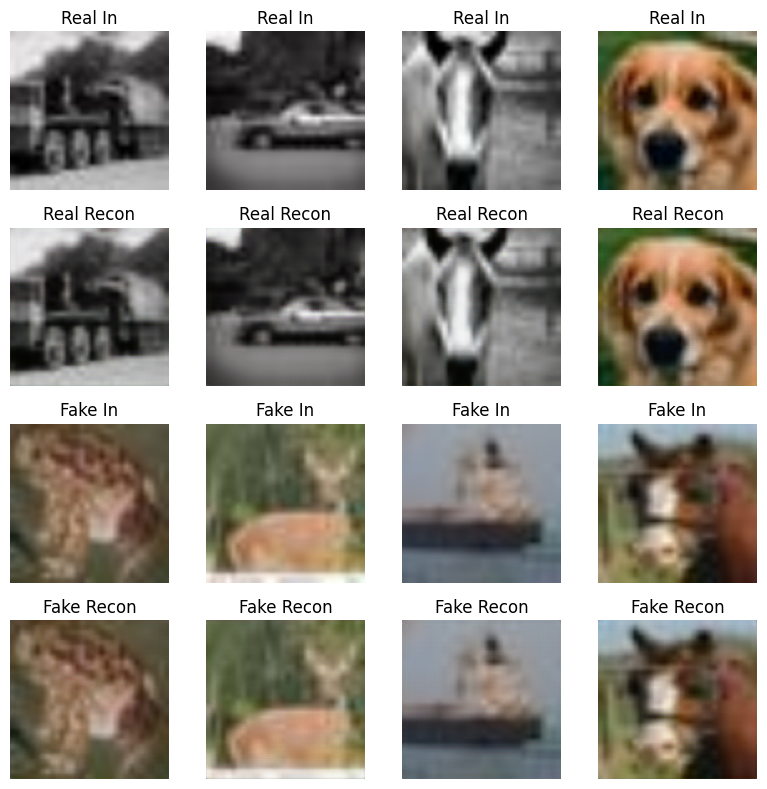

In [8]:
import torch
import matplotlib.pyplot as plt
import tensorflow as tf


vae = SkipConvVAE(img_size=128, latent_dim=256)
vae.load_state_dict(torch.load('skip_vae_two_stage_final.pth', map_location='cpu'))
vae.eval()


real_iter = (
    test_ds
    .unbatch()
    .filter(lambda x,y: tf.equal(y, 0))
    .batch(4)
    .take(1)
)
fake_iter = (
    test_ds
    .unbatch()
    .filter(lambda x,y: tf.equal(y, 1))
    .batch(4)
    .take(1)
)
real_imgs, _ = next(iter(real_iter))
fake_imgs, _ = next(iter(fake_iter))


real_t = tf_to_torch(real_imgs, device='cpu')
fake_t = tf_to_torch(fake_imgs, device='cpu')


with torch.no_grad():
    # real
    mu_r, logv_r, skips_r = vae.encode(real_t)
    z_r = vae.reparam(mu_r, logv_r)
    real_recon = vae.decode(z_r, skips_r)
    # fake
    mu_f, logv_f, skips_f = vae.encode(fake_t)
    z_f = vae.reparam(mu_f, logv_f)
    fake_recon = vae.decode(z_f, skips_f)

fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i in range(4):

    axes[0,i].imshow(real_imgs[i].numpy().astype('uint8'))
    axes[0,i].set_title("Real In")
    axes[0,i].axis('off')

    recon_r = real_recon[i].permute(1,2,0).cpu().numpy()
    axes[1,i].imshow((recon_r * 255).astype('uint8'))
    axes[1,i].set_title("Real Recon")
    axes[1,i].axis('off')

    axes[2,i].imshow(fake_imgs[i].numpy().astype('uint8'))
    axes[2,i].set_title("Fake In")
    axes[2,i].axis('off')

    recon_f = fake_recon[i].permute(1,2,0).cpu().numpy()
    axes[3,i].imshow((recon_f * 255).astype('uint8'))
    axes[3,i].set_title("Fake Recon")
    axes[3,i].axis('off')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


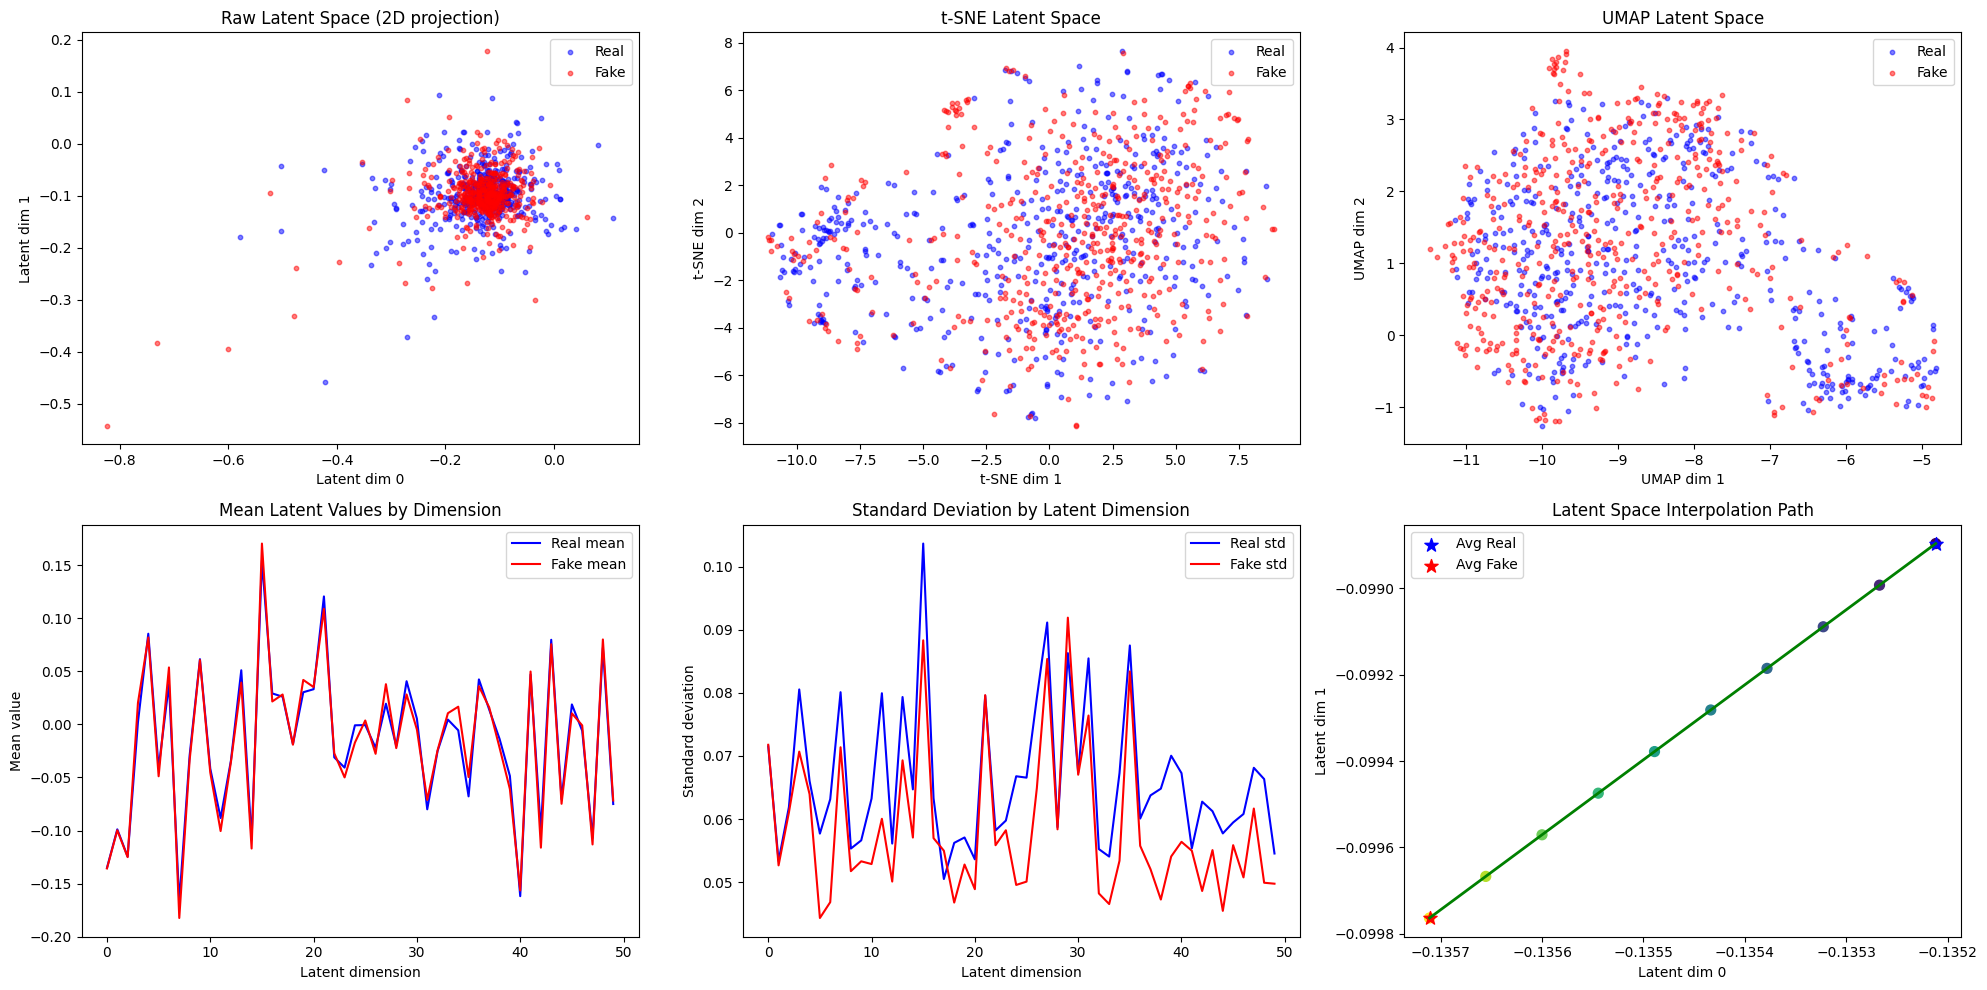

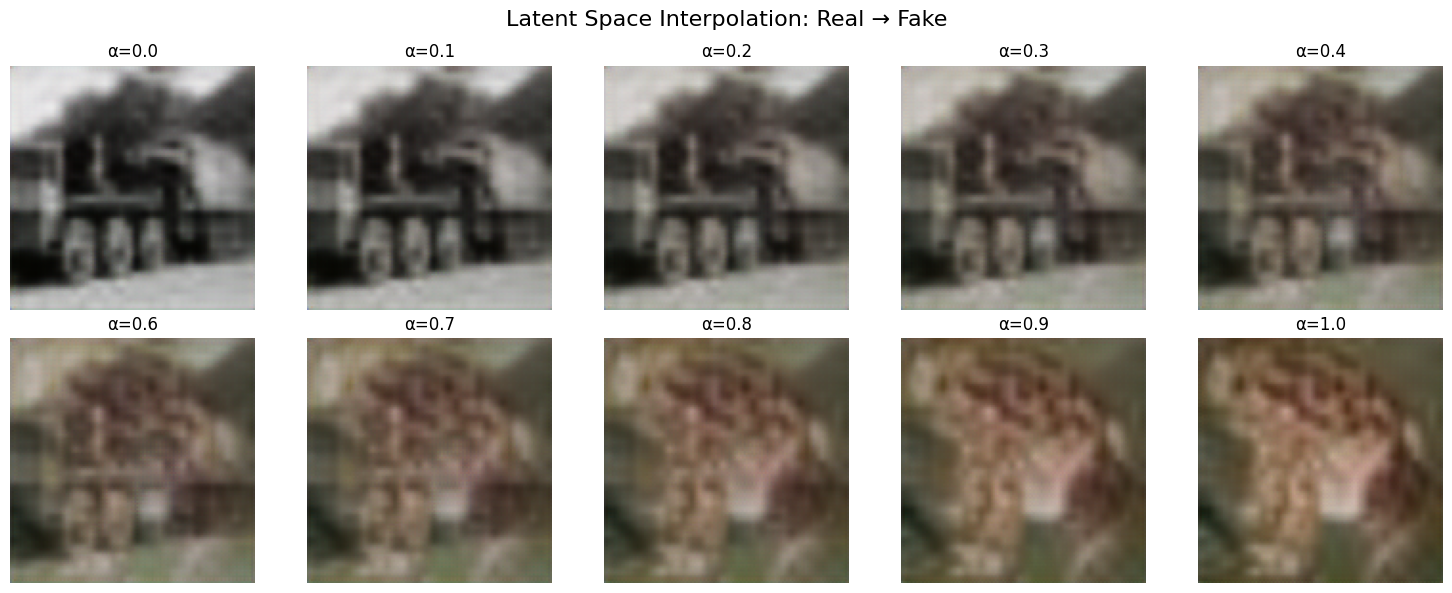

Silhouette score for latent clustering: 0.464


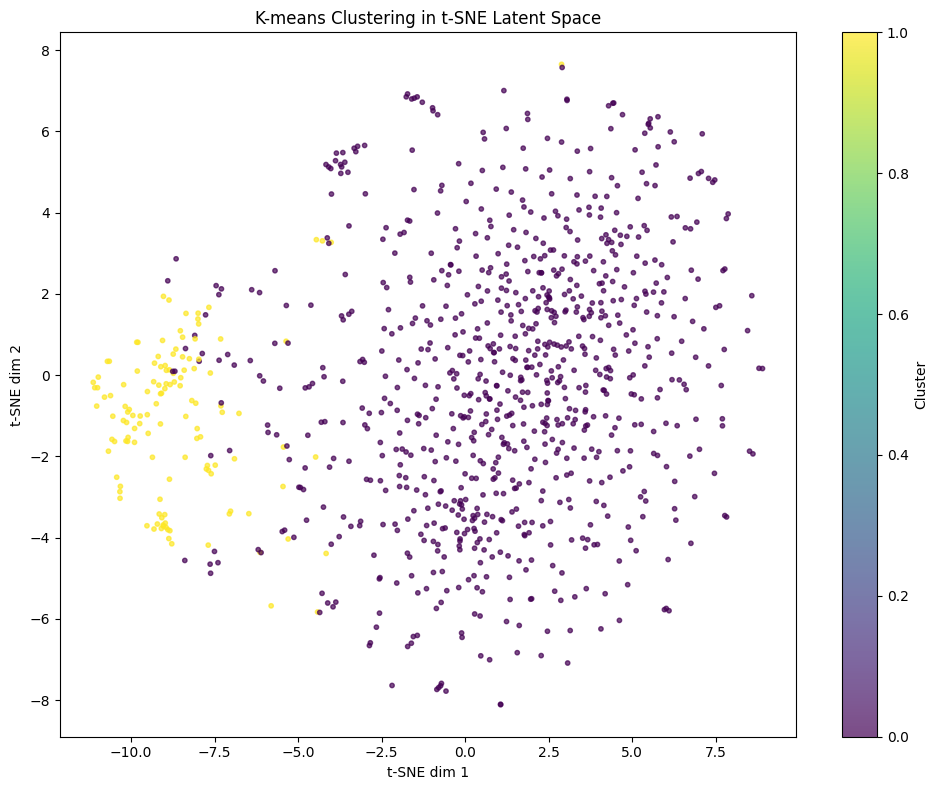


Cluster purity analysis:
Cluster 0: 411 real, 462 fake
Cluster 1: 89 real, 38 fake
Cluster 0 purity: 0.471
Cluster 1 purity: 0.299


In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import umap

def get_latent_representations(vae, dataset, n_samples=500, label=0):

    latent_reps = []
    labels = []

    iter_ds = (
        dataset
        .unbatch()
        .filter(lambda x,y: tf.equal(y, label))
        .batch(32)
        .take(n_samples // 32 + 1)
    )

    with torch.no_grad():
        for batch_imgs, _ in iter_ds:
            batch_t = tf_to_torch(batch_imgs, device='cpu')
            mu, _, _ = vae.encode(batch_t)
            latent_reps.append(mu.cpu().numpy())
            labels.extend([label] * len(batch_imgs))

    latent_reps = np.concatenate(latent_reps, axis=0)[:n_samples]
    labels = np.array(labels[:n_samples])

    return latent_reps, labels

n_samples = 500
real_latents, real_labels = get_latent_representations(vae, test_ds, n_samples, 0)
fake_latents, fake_labels = get_latent_representations(vae, test_ds, n_samples, 1)

all_latents = np.concatenate([real_latents, fake_latents], axis=0)
all_labels = np.concatenate([real_labels, fake_labels], axis=0)


fig = plt.figure(figsize=(20, 10))

# Raw latent space
ax1 = fig.add_subplot(231)
real_mask = all_labels == 0
fake_mask = all_labels == 1
ax1.scatter(all_latents[real_mask, 0], all_latents[real_mask, 1],
           alpha=0.5, label='Real', c='blue', s=10)
ax1.scatter(all_latents[fake_mask, 0], all_latents[fake_mask, 1],
           alpha=0.5, label='Fake', c='red', s=10)
ax1.set_title('Raw Latent Space (2D projection)')
ax1.set_xlabel('Latent dim 0')
ax1.set_ylabel('Latent dim 1')
ax1.legend()

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
latents_tsne = tsne.fit_transform(all_latents)

ax2 = fig.add_subplot(232)
ax2.scatter(latents_tsne[real_mask, 0], latents_tsne[real_mask, 1],
           alpha=0.5, label='Real', c='blue', s=10)
ax2.scatter(latents_tsne[fake_mask, 0], latents_tsne[fake_mask, 1],
           alpha=0.5, label='Fake', c='red', s=10)
ax2.set_title('t-SNE Latent Space')
ax2.set_xlabel('t-SNE dim 1')
ax2.set_ylabel('t-SNE dim 2')
ax2.legend()

# UMAP visualization
reducer = umap.UMAP(n_components=2, random_state=42)
latents_umap = reducer.fit_transform(all_latents)

ax3 = fig.add_subplot(233)
ax3.scatter(latents_umap[real_mask, 0], latents_umap[real_mask, 1],
           alpha=0.5, label='Real', c='blue', s=10)
ax3.scatter(latents_umap[fake_mask, 0], latents_umap[fake_mask, 1],
           alpha=0.5, label='Fake', c='red', s=10)
ax3.set_title('UMAP Latent Space')
ax3.set_xlabel('UMAP dim 1')
ax3.set_ylabel('UMAP dim 2')
ax3.legend()

# Latent space distribution analysis
ax4 = fig.add_subplot(234)
latent_means_real = real_latents.mean(axis=0)
latent_means_fake = fake_latents.mean(axis=0)
ax4.plot(latent_means_real[:50], label='Real mean', c='blue')
ax4.plot(latent_means_fake[:50], label='Fake mean', c='red')
ax4.set_title('Mean Latent Values by Dimension')
ax4.set_xlabel('Latent dimension')
ax4.set_ylabel('Mean value')
ax4.legend()

# Latent space standard deviation
ax5 = fig.add_subplot(235)
latent_std_real = real_latents.std(axis=0)
latent_std_fake = fake_latents.std(axis=0)
ax5.plot(latent_std_real[:50], label='Real std', c='blue')
ax5.plot(latent_std_fake[:50], label='Fake std', c='red')
ax5.set_title('Standard Deviation by Latent Dimension')
ax5.set_xlabel('Latent dimension')
ax5.set_ylabel('Standard deviation')
ax5.legend()

# Latent space interpolation
ax6 = fig.add_subplot(236)

avg_real_latent = real_latents.mean(axis=0)
avg_fake_latent = fake_latents.mean(axis=0)

n_steps = 10
alpha_values = np.linspace(0, 1, n_steps)
interpolated_latents = []
for alpha in alpha_values:
    interpolated = (1 - alpha) * avg_real_latent + alpha * avg_fake_latent
    interpolated_latents.append(interpolated)


interpolated_array = np.array(interpolated_latents)
ax6.plot(interpolated_array[:, 0], interpolated_array[:, 1], 'g-', linewidth=2)
ax6.scatter(interpolated_array[:, 0], interpolated_array[:, 1], c=alpha_values, cmap='viridis', s=50)
ax6.scatter(avg_real_latent[0], avg_real_latent[1], c='blue', s=100, marker='*', label='Avg Real')
ax6.scatter(avg_fake_latent[0], avg_fake_latent[1], c='red', s=100, marker='*', label='Avg Fake')
ax6.set_title('Latent Space Interpolation Path')
ax6.set_xlabel('Latent dim 0')
ax6.set_ylabel('Latent dim 1')
ax6.legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, n_steps//2, figsize=(15, 6))
axes = axes.ravel()

with torch.no_grad():
    for i, interpolated in enumerate(interpolated_latents):

        z = torch.tensor(interpolated).unsqueeze(0).float()

        real_mu, _, real_skips = vae.encode(real_t[:1])
        fake_mu, _, fake_skips = vae.encode(fake_t[:1])

        interpolated_skips = []
        for r_skip, f_skip in zip(real_skips, fake_skips):
            alpha = alpha_values[i]
            interp_skip = (1 - alpha) * r_skip + alpha * f_skip
            interpolated_skips.append(interp_skip)

        reconstructed = vae.decode(z, interpolated_skips)
        img = reconstructed[0].permute(1, 2, 0).cpu().numpy()
        img = (img * 255).clip(0, 255).astype('uint8')

        axes[i].imshow(img)
        axes[i].set_title(f'α={alpha_values[i]:.1f}')
        axes[i].axis('off')

plt.suptitle('Latent Space Interpolation: Real → Fake', fontsize=16)
plt.tight_layout()
plt.show()

# Latent space clustering analysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Perform K-means clustering on latent representations
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(all_latents)


silhouette_avg = silhouette_score(all_latents, cluster_labels)
print(f"Silhouette score for latent clustering: {silhouette_avg:.3f}")


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
scatter = ax.scatter(latents_tsne[:, 0], latents_tsne[:, 1],
                    c=cluster_labels, cmap='viridis', alpha=0.7, s=10)
ax.set_title('K-means Clustering in t-SNE Latent Space')
ax.set_xlabel('t-SNE dim 1')
ax.set_ylabel('t-SNE dim 2')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

real_in_cluster_0 = np.sum((cluster_labels == 0) & (all_labels == 0))
fake_in_cluster_0 = np.sum((cluster_labels == 0) & (all_labels == 1))
real_in_cluster_1 = np.sum((cluster_labels == 1) & (all_labels == 0))
fake_in_cluster_1 = np.sum((cluster_labels == 1) & (all_labels == 1))

print("\nCluster purity analysis:")
print(f"Cluster 0: {real_in_cluster_0} real, {fake_in_cluster_0} fake")
print(f"Cluster 1: {real_in_cluster_1} real, {fake_in_cluster_1} fake")
print(f"Cluster 0 purity: {real_in_cluster_0/(real_in_cluster_0+fake_in_cluster_0):.3f}")
print(f"Cluster 1 purity: {fake_in_cluster_1/(real_in_cluster_1+fake_in_cluster_1):.3f}")

In [12]:
import torch
import numpy as np
from scipy.stats import ttest_rel


def per_image_mse(x, x_hat):
    diff = (x - x_hat).reshape(x.size(0), -1)
    return torch.mean(diff**2, dim=1)

def per_image_psnr(x, x_hat, max_val=1.0):
    mse = per_image_mse(x, x_hat)
    return 10 * torch.log10(max_val**2 / mse)


N = 1000
batch_size = 32
latent_dim = 256


real_iter = (
    test_ds.unbatch()
           .filter(lambda x,y: tf.equal(y, 0))
           .batch(batch_size)
           .take((N + batch_size - 1)//batch_size)
)
fake_iter = (
    test_ds.unbatch()
           .filter(lambda x,y: tf.equal(y, 1))
           .batch(batch_size)
           .take((N + batch_size - 1)//batch_size)
)

mse_real_list, mse_fake_list = [], []
psnr_real_list, psnr_fake_list = [], []

import itertools
real_batches = iter(real_iter)
fake_batches = iter(fake_iter)

collected = 0
while collected < N:
    try:
        real_imgs, _ = next(real_batches)
        fake_imgs, _ = next(fake_batches)
    except StopIteration:
        break

    real_t = tf_to_torch(real_imgs, device='cpu')
    fake_t = tf_to_torch(fake_imgs, device='cpu')

    with torch.no_grad():
        mu_r, logv_r, skips_r = vae.encode(real_t)
        z_r = vae.reparam(mu_r, logv_r)
        real_recon = vae.decode(z_r, skips_r)

        mu_f, logv_f, skips_f = vae.encode(fake_t)
        z_f = vae.reparam(mu_f, logv_f)
        fake_recon = vae.decode(z_f, skips_f)

    m_r = per_image_mse(real_t,  real_recon).cpu().numpy()
    m_f = per_image_mse(fake_t,  fake_recon).cpu().numpy()
    p_r = per_image_psnr(real_t, real_recon).cpu().numpy()
    p_f = per_image_psnr(fake_t, fake_recon).cpu().numpy()

    needed = min(len(m_r), N - collected)
    mse_real_list.extend(m_r[:needed])
    mse_fake_list.extend(m_f[:needed])
    psnr_real_list.extend(p_r[:needed])
    psnr_fake_list.extend(p_f[:needed])
    collected += needed

mse_real = np.array(mse_real_list)
mse_fake = np.array(mse_fake_list)
psnr_real = np.array(psnr_real_list)
psnr_fake = np.array(psnr_fake_list)

# Paired t‑tests
t_mse, p_mse   = ttest_rel(mse_real, mse_fake)
t_psnr, p_psnr = ttest_rel(psnr_real, psnr_fake)

print(f"Real vs Fake over {len(mse_real)} images:")
print(f" MSE:  mean real={mse_real.mean():.5f}, fake={mse_fake.mean():.5f}")
print(f"   Paired‑t t={t_mse:.3f}, p={p_mse:.3e}")
print(f" PSNR: real={psnr_real.mean():.2f}dB, fake={psnr_fake.mean():.2f}dB")
print(f"   Paired‑t t={t_psnr:.3f}, p={p_psnr:.3e}")


Real vs Fake over 1000 images:
 MSE:  mean real=0.00017, fake=0.00018
   Paired‑t t=-1.785, p=7.457e-02
 PSNR: real=37.96dB, fake=38.01dB
   Paired‑t t=-0.545, p=5.861e-01


## References

- **Krizhevsky, A., & Hinton, G. (2009).** Learning multiple layers of features from tiny images.  
- **Bird, J. J., & Lotfi, A. (2024).** CIFAKE: Image Classification and Explainable Identification of AI-Generated Synthetic Images. *IEEE Access*.  

Real images are from Krizhevsky & Hinton (2009), fake images are from Bird & Lotfi (2024). The Bird & Lotfi study is available [here](https://www.ieee.org/your-paper-link).

